In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import movavg
import brewer2mpl as b2mpl
import seaborn as sns

sns.set_style('ticks')
sns.set_context('poster')
%matplotlib inline

colors = b2mpl.get_map('Set1', 'Qualitative', 9).mpl_colors
gauss_shading = b2mpl.get_map('Greys', 'Sequential', 5).mpl_colors

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def gaussEllipse(mu, Sigma, p):
    n = 100
    D, U = np.linalg.eig(Sigma)
    t = np.linspace(0, 2 * np.pi, 100)
    xy = np.row_stack([np.cos(t), np.sin(t)])
    k = np.sqrt(sp.stats.chi2.ppf(p, 2))
    w = np.dot(k * U * np.sqrt(D), xy)
    z = np.repeat(np.atleast_2d(mu).reshape(2, 1), n, axis=1) + w
    return z

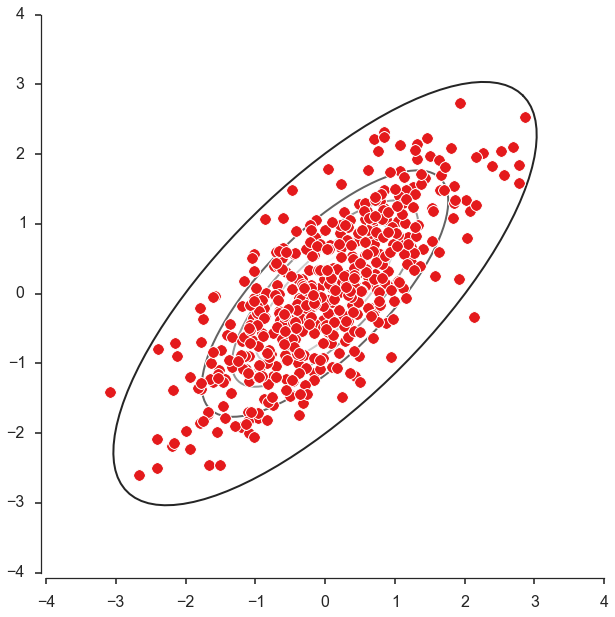

In [3]:
mean = np.array([0, 0])
cov = np.array([[1, .75], [.75, 1]])
data = np.random.multivariate_normal(mean, cov, size=500)
data = (data - data.mean(axis=0)) / data.std(axis=0, ddof=0)

plt.figure(figsize=(10, 10))
plt.plot(data[:,0], data[:,1], linestyle='none', color=colors[0], marker='o', markeredgecolor='white', markeredgewidth=1)
for i in range(5):
    xy = gaussEllipse(mean, cov, 0.19 + .2 * i)
    plt.plot(xy[0, :], xy[1, :], color=gauss_shading[i], linewidth=2, zorder=0)
plt.xlim(-4, 4)
plt.ylim(-4, 4)         
sns.despine(offset=5, trim=True)


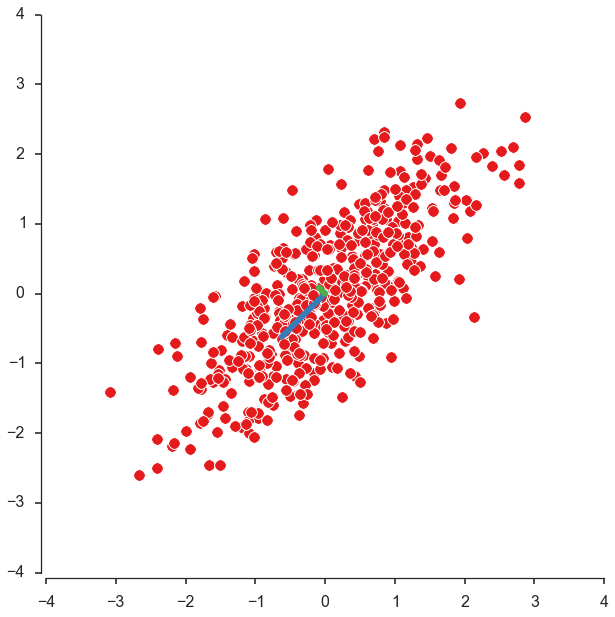

In [4]:
u, s, v = np.linalg.svd(data)
#s, v = np.linalg.eig(np.cov(samples.T))
var = s**2 / np.sum(s**2)

plt.figure(figsize=(10, 10))
plt.plot(data[:,0], data[:,1], linestyle='none', color=colors[0], marker='o', markeredgecolor='white', markeredgewidth=1)
x = np.array([0, v[0, 0]]) * var[0]
y = np.array([0, v[0, 1]]) * var[0]
plt.plot(x, y, linewidth=6, color=colors[1])

x = np.array([0, v[1, 0]]) * var[1]
y = np.array([0, v[1, 1]]) * var[1]
plt.plot(x, y, linewidth=6, color=colors[2])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
sns.despine(offset=5, trim=True)

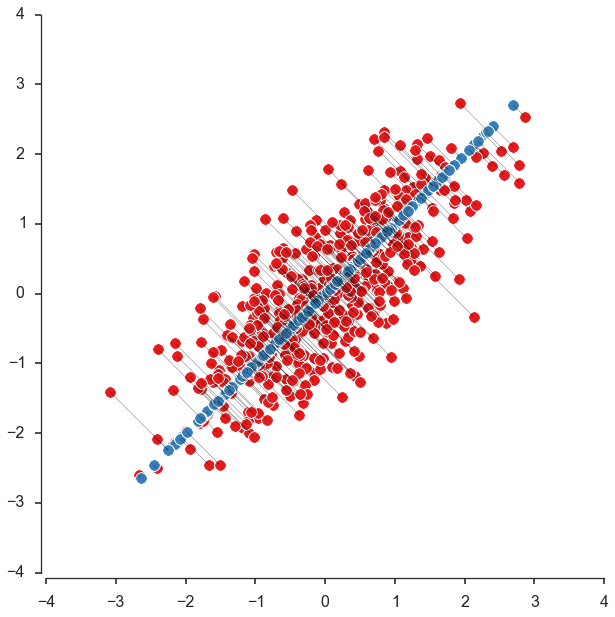

In [5]:
dot_prod = data.dot(v[0, :])
scale = np.array([dot_prod, dot_prod])
proj = scale.T * v[0, :]

plt.figure(figsize=(10, 10))
plt.plot(data[:,0], data[:,1], linestyle='none', color=colors[0], marker='o', markeredgecolor='white', markeredgewidth=1)
plt.plot(proj[:, 0], proj[:, 1], linestyle='none', color=colors[1], marker='o', markeredgecolor='white', markeredgewidth=1)

errors1 = np.zeros(len(data))
for i in range(len(data)):
    plt.plot([data[i, 0], proj[i, 0]], [data[i, 1], proj[i, 1]], linewidth=.25, color='k')
    errors1[i] = np.linalg.norm(data[i, :] - proj[i, :])

plt.xlim(-4, 4)
plt.ylim(-4, 4)         
sns.despine(offset=5, trim=True)

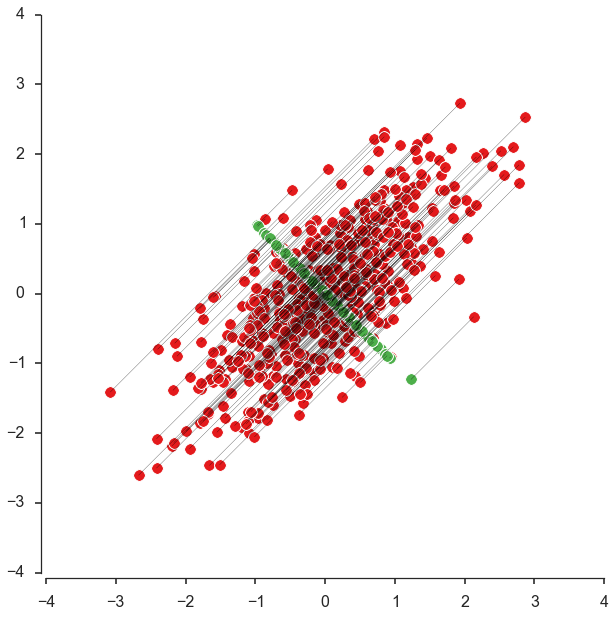

In [6]:
dot_prod = data.dot(v[1, :])
scale = np.array([dot_prod, dot_prod])
proj = scale.T * v[1, :]

plt.figure(figsize=(10, 10))
plt.plot(data[:,0], data[:,1], linestyle='none', color=colors[0], marker='o', markeredgecolor='white', markeredgewidth=1)
plt.plot(proj[:, 0], proj[:, 1], linestyle='none', color=colors[2], marker='o', markeredgecolor='white', markeredgewidth=1)

errors2 = np.zeros(len(data))
for i in range(len(data)):
    plt.plot([data[i, 0], proj[i, 0]], [data[i, 1], proj[i, 1]], linewidth=.25, color='k')
    errors2[i] = np.linalg.norm(data[i, :] - proj[i, :])

plt.xlim(-4, 4)
plt.ylim(-4, 4)         
sns.despine(offset=5, trim=True)

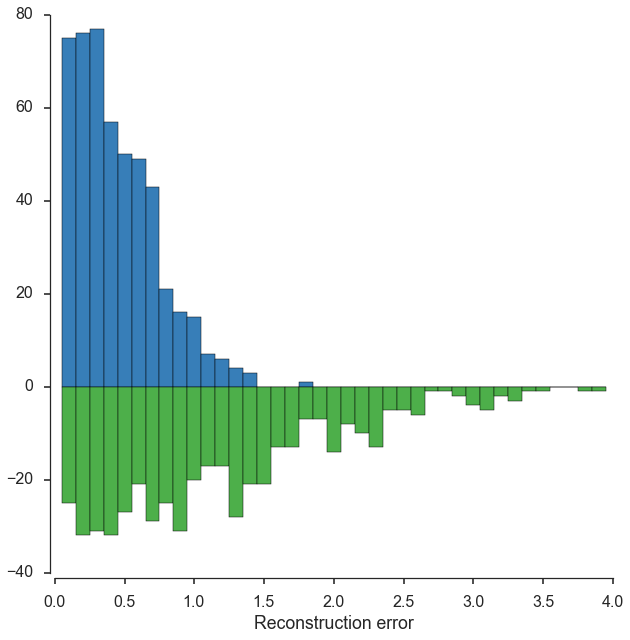

In [7]:
dot_prod = data.dot(v.T)
plt.figure(figsize=(10, 10))
n, bins=np.histogram(errors1, np.arange(0, 4, .1))
plt.bar(movavg(bins, 2), n, width = .1, color=colors[1])
n, bins=np.histogram(errors2, np.arange(0, 4, .1))
plt.bar(movavg(bins, 2), -n, width = .1, color=colors[2])
plt.xlabel('Reconstruction error')
sns.despine(offset=5, trim=True)

(array([ 0.87664772,  0.12335228]), array([ 0.87664772,  0.12335228]))

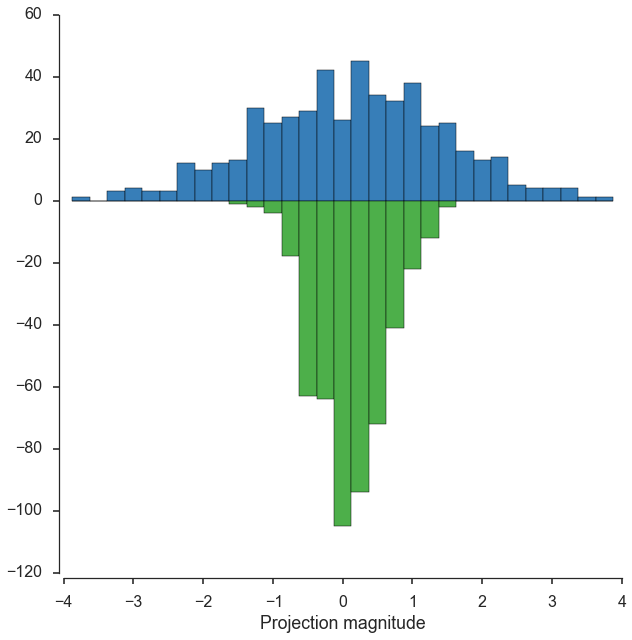

In [8]:
dot_prod = data.dot(v.T)
plt.figure(figsize=(10, 10))
n, bins=np.histogram(dot_prod[:, 0], np.arange(-4, 4, .25))
plt.bar(movavg(bins, 2), n, width = .25, color=colors[1])
n, bins=np.histogram(dot_prod[:, 1], np.arange(-4, 4, .25))
plt.bar(movavg(bins, 2), -n, width = .25, color=colors[2])
plt.xlabel('Projection magnitude')
sns.despine(offset=5, trim=True)

variance = np.var(dot_prod, axis=0, ddof=0)
u1, s1, v1 = np.linalg.svd(np.corrcoef(data, rowvar=0, ddof=0))
u, s, v = np.linalg.svd(data)
variance / np.sum(variance), s**2/np.sum(s**2)

In [11]:
def pca_eig(orig_data):
    data = np.array(orig_data)
    C = np.cov(data, rowvar=0, ddof=0)
    w, v = np.linalg.eig(C)
    print "Using numpy.linalg.eig"
    print w/np.sum(w)

def pca_svd(orig_data):
    data = np.array(orig_data)
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    u, s, v = np.linalg.svd(data)
    print "Using numpy.linalg.svd"
    print s**2/np.sum(s**2)
    
pca_eig(data)
pca_svd(data)

Using numpy.linalg.eig
[ 0.12335228  0.87664772]
Using numpy.linalg.svd
[ 0.87664772  0.12335228]
